<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/2-machine-learning/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1: Explorando los datos**

In [1]:
import pandas as pd

datos =  pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [2]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


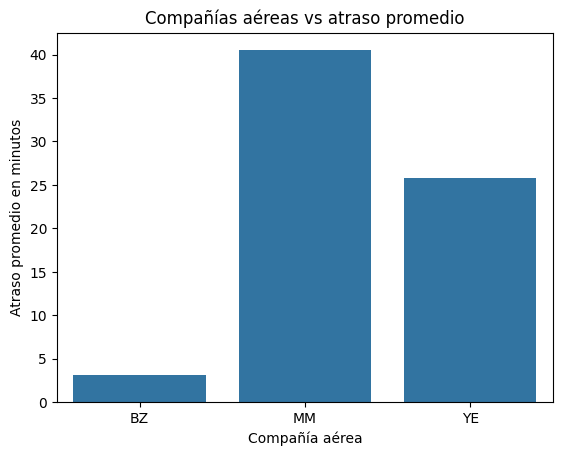

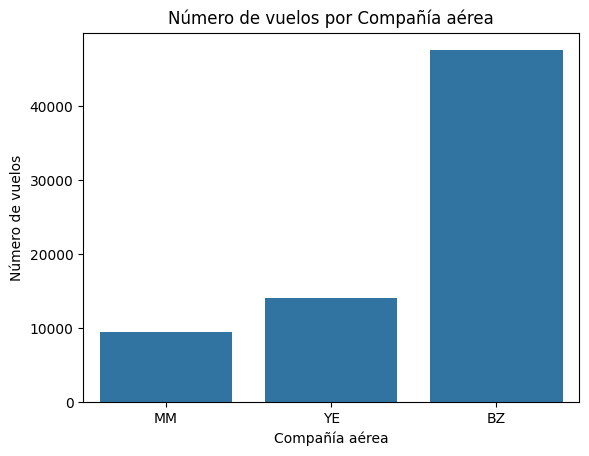

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

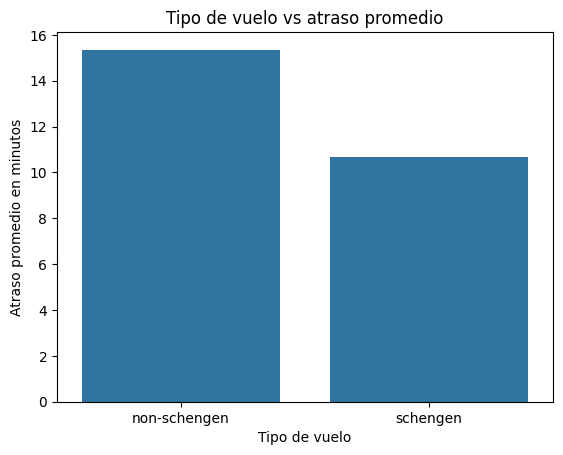

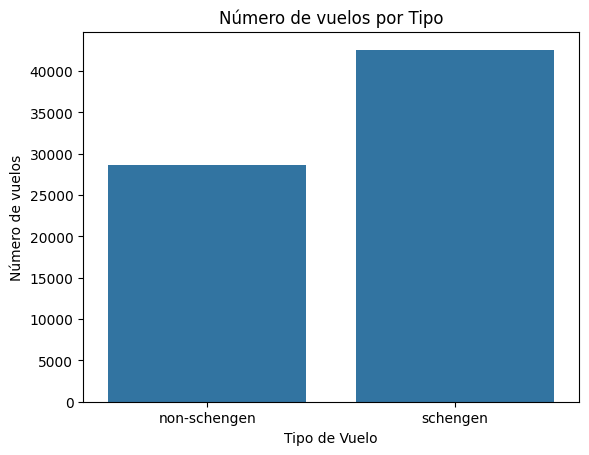

In [7]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

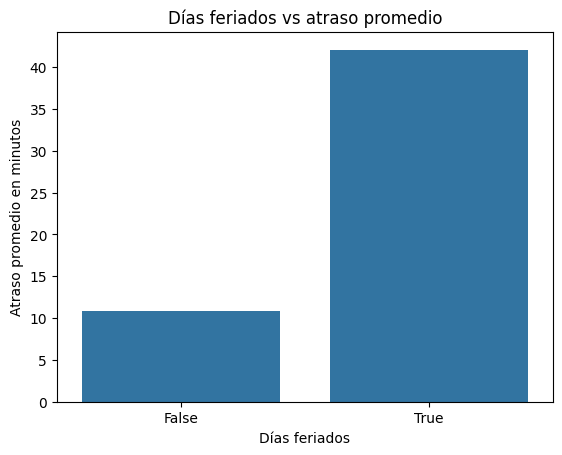

In [8]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [9]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

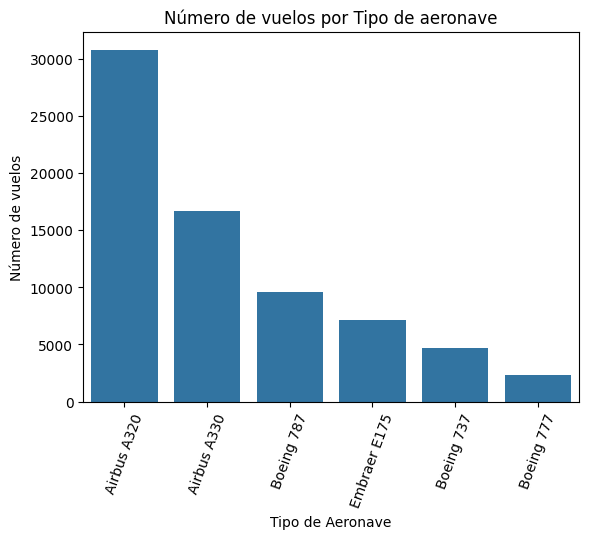

In [10]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

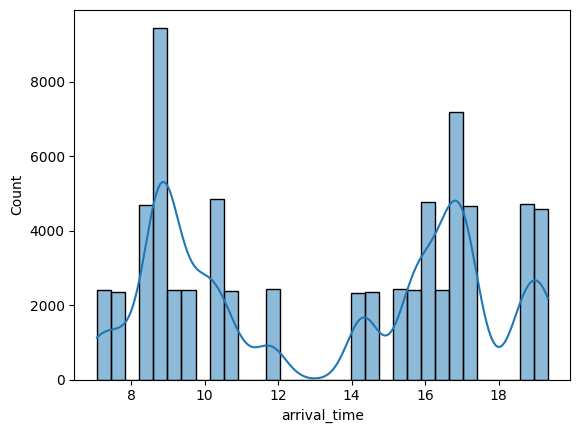

In [11]:
sns.histplot(data=datos,x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [12]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

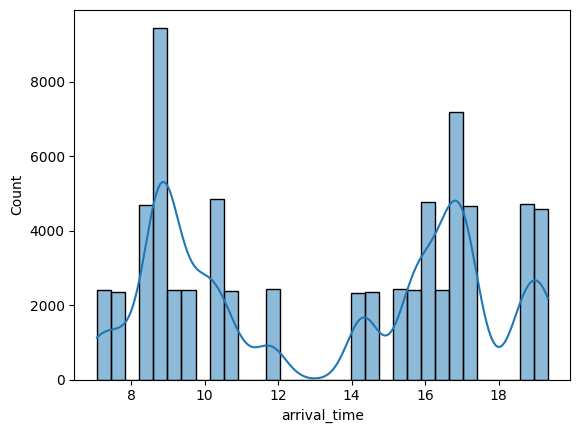

In [13]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='arrival_time', ylabel='Count'>

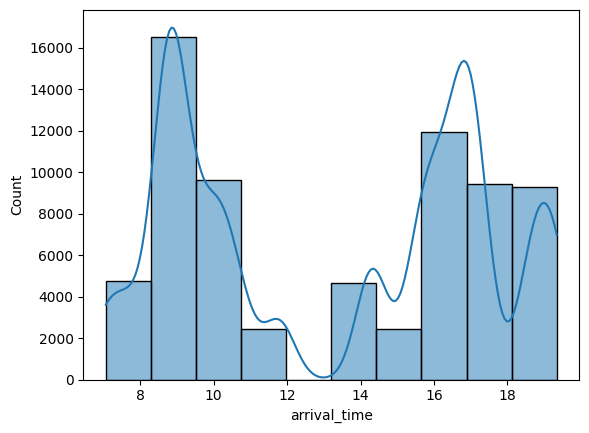

In [14]:
sns.histplot(data=datos,x='arrival_time',kde=True,bins=10)

<Axes: xlabel='departure_time', ylabel='Count'>

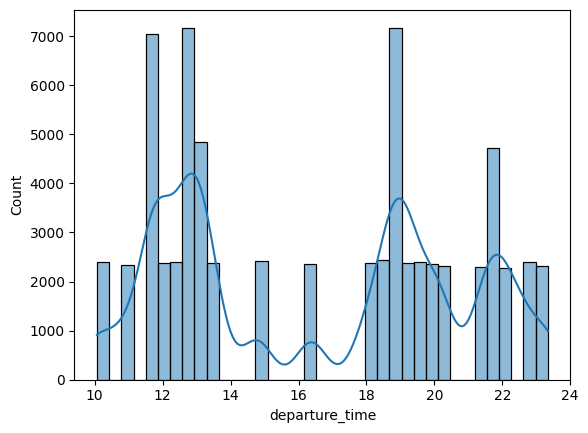

In [15]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

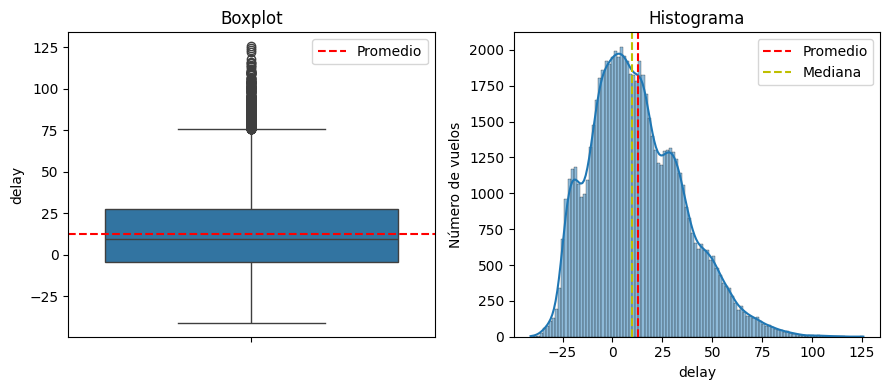

In [16]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#**CLASE 2: Feature engineering**

In [17]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [18]:
datos['date']=datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos['date']=pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [19]:
datos['is_weekend']=datos['date'].dt.weekday.isin([5,6])
datos['day_name']=datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
2937,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,195,2010,False,19.573663,2010-07-15,False,Thursday
55282,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,35,2020,False,14.671820,2020-02-05,False,Wednesday
3922,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,261,2010,False,-5.167616,2010-09-19,True,Sunday
50603,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,88,2019,False,29.991005,2019-03-30,True,Saturday
32286,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,327,2015,False,6.895378,2015-11-24,False,Tuesday


In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
49151,25,BZ,Boeing 777,0,CSF,19.341235,23.341235,356,2018,0,24.418346,2018-12-23,1,Sunday
47828,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,268,2018,0,-16.833674,2018-09-26,0,Wednesday
20935,12,YE,Airbus A330,1,TZF,17.313731,21.313731,300,2013,1,78.339866,2013-10-28,0,Monday


In [23]:
categoricas=['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas,dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Limpiando los datos

In [24]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [25]:
datos_codificados=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.sample(10)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
15908,11,0,10.177197,13.177197,330,2012,0,-2.343941,2012-11-26,0,...,0,0,0,0,1,0,0,0,0,0
65785,2,1,19.196804,22.196804,5,2022,0,5.000009,2022-01-06,0,...,0,0,1,0,0,0,0,1,0,0
68403,21,1,7.065594,10.065594,180,2022,0,6.813521,2022-06-30,0,...,0,0,0,0,0,0,0,1,0,0
65012,8,1,15.729617,18.729617,319,2021,0,-3.177148,2021-11-16,0,...,0,0,1,0,0,0,0,0,1,0
6783,9,0,10.733469,12.733469,87,2011,0,-16.506963,2011-03-29,0,...,0,1,0,0,0,0,0,0,1,0
42626,7,1,8.564949,13.564949,286,2017,0,38.284796,2017-10-14,1,...,0,1,0,0,0,1,0,0,0,0
54442,21,1,7.065594,10.065594,344,2019,0,11.422395,2019-12-11,0,...,0,0,0,0,0,0,0,0,0,1
65889,19,1,16.245220,19.245220,12,2022,0,24.982247,2022-01-13,0,...,0,1,0,0,0,0,0,1,0,0
4227,11,0,10.177197,13.177197,281,2010,0,-7.226898,2010-10-09,1,...,0,0,0,0,0,1,0,0,0,0
34505,7,1,8.564949,13.564949,110,2016,0,19.245963,2016-04-20,0,...,0,1,0,0,0,0,0,0,0,1


Utilizar ambas variables en el modelo, puede terminar en sesgo.

In [26]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [27]:
df=datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
47361,1,8.591208,0,31.187717,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
41215,0,10.733469,0,-14.334157,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
23821,1,14.376052,0,-4.458100,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
48137,1,9.344097,0,-9.383049,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1756,0,19.341235,0,-0.047809,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23534,0,8.885071,0,32.813504,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
14158,1,16.245220,0,38.037890,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
46625,1,9.668655,0,27.507963,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
61212,0,8.939996,0,74.776137,1,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
54920,1,16.245220,0,28.447277,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


Manos a la obra. Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


#**CLASE 3: Selección y validación del modelo**

https://scikit-learn.org/stable/

In [29]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X =df.drop(['delay'],axis=1)
y=df['delay']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [30]:
from uuid import RFC_4122
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy=baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  metricas={
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [31]:
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

##Entrenando con bosques aleatorios

In [32]:
from sklearn.ensemble import RandomForestRegressor

modelo=RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train,y_train)
ypred=modelo.predict(X_test)

resultados_rf=calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

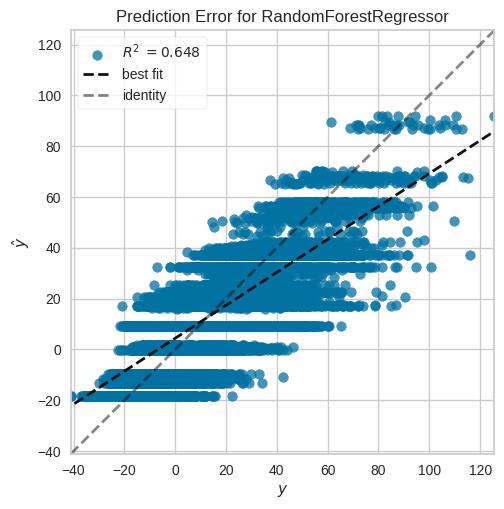

In [33]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

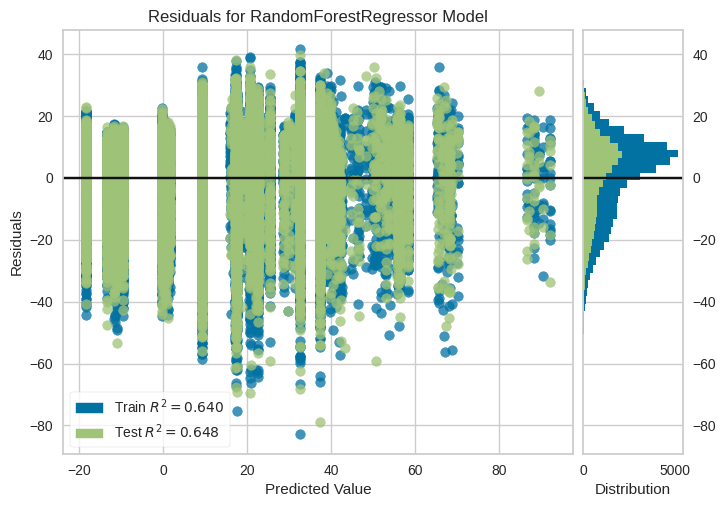

In [34]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [35]:
from sklearn.model_selection import KFold,cross_validate

scoring={
    'RSME':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)

In [36]:
cv_results

{'fit_time': array([2.80008292, 2.7638011 , 2.79632163, 3.81369066, 2.78606081]),
 'score_time': array([0.05583668, 0.05545282, 0.05592823, 0.05568385, 0.06033039]),
 'test_RSME': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#**CLASE 4: Optimización de hiperparámetros**

In [37]:
len(df.columns)

31

In [39]:
importances=modelo.feature_importances_
importances

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [42]:
feature_importances=pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [45]:
[i if i !=0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [49]:
resultados=pd.DataFrame(index=['RSME','MAE','R2'])
model_features=RandomForestRegressor(max_depth=5, random_state=42)
ct_features=[i if i !=0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features=feature_importances['Features'].values[:i]
  X_train_sel=X_train[selected_features]
  X_test_sel=X_test[selected_features]

  model_features.fit(X_train_sel,y_train)
  y_pred=model_features.predict(X_test_sel)

  metricas=calcular_regresion(y_test,y_pred)

  resultados[i] = list(metricas.values())


resultados

,1,5,10,15,20,25,30
RSME,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [50]:
resultados=pd.DataFrame(index=['RSME','MAE','R2'])
model_features=RandomForestRegressor(max_depth=5, random_state=42)
ct_features=range(10,16)

for i in ct_features:
  selected_features=feature_importances['Features'].values[:i]
  X_train_sel=X_train[selected_features]
  X_test_sel=X_test[selected_features]

  model_features.fit(X_train_sel,y_train)
  y_pred=model_features.predict(X_test_sel)

  metricas=calcular_regresion(y_test,y_pred)

  resultados[i] = list(metricas.values())


resultados

,10,11,12,13,14,15
RSME,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [51]:
  selected_features=feature_importances['Features'].values[:14]
  X_selected_features=X[selected_features]

In [52]:
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL,aircraft_type_Boeing 737
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0,0


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_selected_features,y,random_state=42)

In [54]:
param_grid={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]

}

In [55]:
from sklearn.model_selection import GridSearchCV

cv=KFold(n_splits=5,shuffle=True,random_state=42)

model_grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid,scoring='r2',cv=cv)
model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [56]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [57]:
y_pred_grid=model_grid.predict(X_test)
metricas_model_grid=calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6295, 'R2': 0.6754}

In [58]:
resultados['modelo_grid']=list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RSME,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6295
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [61]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
    print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo:', str(e))

Modelo serializado con éxito


###Manos a la obra

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [65]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]

In [66]:
#Carga el modelo guardado utilizando la función pickle.load():
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

In [67]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(48.72895275024509)

De esta manera, podemos utilizar el modelo guardado previamente para hacer predicciones en nuevos datos.